In [1]:
import pandas as pd
from datasets import load_dataset, \
    concatenate_datasets

from transformers import AutoTokenizer

In [2]:
data = load_dataset('NLBSE/nlbse25-code-comment-classification')

In [3]:
data["java_train"][1]

{'index': 1,
 'class': 'Abfss.java',
 'comment_sentence': 'this impl delegates to the old filesystem',
 'partition': 0,
 'combo': 'this impl delegates to the old filesystem | Abfss.java',
 'labels': [0, 0, 1, 0, 0, 0, 0]}

In [4]:
langs = ['java', 'python', 'pharo']
labels = {
    'java': ['summary', 'Ownership', 'Expand', 'usage', 'Pointer', 'deprecation', 'rational'],
    'python': ['Usage', 'Parameters', 'DevelopmentNotes', 'Expand', 'Summary'],
    'pharo': ['Keyimplementationpoints', 'Example', 'Responsibilities', 'Classreferences', 'Intent', 'Keymessages', 'Collaborators']
}

def split_list_into_columns(row, lang):
    values_list = row['labels']  # Replace 'values' with your actual column name
    dict = {}
    for key in labels[lang]:
        dict[key] = values_list[labels[lang].index(key)]

    return dict

def print_labels(data, lang):
    for label in labels[lang]:
        group = data.groupby(label).count()
        print("label " + label)
        print("positive", group["class"][1], ",negative", group["class"][0], "---", group["class"][1]+group["class"][0])

java = concatenate_datasets([data["java_train"], data["java_test"]]).map(lambda row: split_list_into_columns(row, "java")).to_pandas()
python = concatenate_datasets([data["python_train"], data["python_test"]]).map(lambda row: split_list_into_columns(row, "python")).to_pandas()
pharo = concatenate_datasets([data["pharo_train"], data["pharo_test"]]).map(lambda row: split_list_into_columns(row, "pharo")).to_pandas()


In [5]:
print_labels(java, "java")

label summary
positive 4502 ,negative 4837 --- 9339
label Ownership
positive 312 ,negative 9027 --- 9339
label Expand
positive 611 ,negative 8728 --- 9339
label usage
positive 2524 ,negative 6815 --- 9339
label Pointer
positive 1088 ,negative 8251 --- 9339
label deprecation
positive 132 ,negative 9207 --- 9339
label rational
positive 379 ,negative 8960 --- 9339


In [6]:
print_labels(python, "python")

label Usage
positive 699 ,negative 1591 --- 2290
label Parameters
positive 700 ,negative 1590 --- 2290
label DevelopmentNotes
positive 251 ,negative 2039 --- 2290
label Expand
positive 407 ,negative 1883 --- 2290
label Summary
positive 429 ,negative 1861 --- 2290


In [7]:
print_labels(pharo, "pharo")

label Keyimplementationpoints
positive 221 ,negative 1366 --- 1587
label Example
positive 666 ,negative 921 --- 1587
label Responsibilities
positive 297 ,negative 1290 --- 1587
label Classreferences
positive 50 ,negative 1537 --- 1587
label Intent
positive 181 ,negative 1406 --- 1587
label Keymessages
positive 257 ,negative 1330 --- 1587
label Collaborators
positive 86 ,negative 1501 --- 1587


In [8]:
import pandas as pd
from tqdm import tqdm

data = load_dataset('NLBSE/nlbse25-code-comment-classification')
data = pd.concat([data["java_train"].to_pandas(), data["java_test"].to_pandas(), data["python_train"].to_pandas(), data["python_test"].to_pandas(), data["pharo_train"].to_pandas(), data["pharo_test"].to_pandas()])
data["len_tokens"] = None

len(data)
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

pbar = tqdm(total=len(data), desc="adding tokens length...")

for index, row in data.iterrows():
    input = row["combo"]
    tokens = tokenizer.encode(input)
    len_tokens = len(tokens)
    data.loc[index, "len_tokens"] = len_tokens
    pbar.update(1)

pbar.close()

data

adding tokens length...: 100%|██████████| 13216/13216 [00:01<00:00, 9143.57it/s]


,index,class,comment_sentence,partition,combo,labels,len_tokens
0,0,Abfss.java,azure blob file system implementation of abstr...,0,azure blob file system implementation of abstr...,"[1, 0, 0, 0, 0, 0, 0]",20
1,1,Abfss.java,this impl delegates to the old filesystem,0,this impl delegates to the old filesystem | Ab...,"[0, 0, 1, 0, 0, 0, 0]",28
2,2,AbstractContractGetFileStatusTest.java,test getfilestatus and related listing operati...,0,test getfilestatus and related listing operati...,"[1, 0, 0, 0, 0, 0, 0]",30
3,11,AbstractContractGetFileStatusTest.java,path filter which only expects paths whose fin...,0,path filter which only expects paths whose fin...,"[0, 0, 1, 0, 0, 0, 0]",24
4,15,AbstractContractGetFileStatusTest.java,a filesystem filter which exposes the protecte...,0,a filesystem filter which exposes the protecte...,"[0, 0, 1, 0, 0, 0, 0]",26
...,...,...,...,...,...,...,...
284,1812,WAPlugin,to add a new plugin make sure you choose the r...,1,to add a new plugin make sure you choose the r...,"[0, 0, 1, 0, 0, 0, 0]",30
285,1814,WAProtectionFilter,the protection filter ensures that the wrapped...,1,the protection filter ensures that the wrapped...,"[0, 0, 1, 0, 0, 0, 0]",24
286,1816,WARedirectingRegistry,i revert to the old 33.0 behavior which is eas...,1,i revert to the old 33.0 behavior which is eas...,"[0, 0, 1, 0, 0, 0, 0]",24
287,1818,WARequestContext,it does not matter if this is a request to a s...,1,it does not matter if this is a request to a s...,"[0, 0, 1, 0, 0, 0, 0]",39


In [9]:
list_token_length = data["len_tokens"].tolist()
list_token_length

[20,
 28,
 30,
 24,
 26,
 16,
 18,
 20,
 8,
 16,
 19,
 17,
 25,
 18,
 18,
 51,
 23,
 24,
 22,
 28,
 29,
 8,
 7,
 26,
 34,
 19,
 15,
 16,
 21,
 9,
 21,
 15,
 28,
 25,
 26,
 27,
 28,
 41,
 24,
 18,
 8,
 26,
 19,
 14,
 13,
 17,
 11,
 20,
 11,
 11,
 22,
 15,
 19,
 11,
 10,
 10,
 19,
 44,
 55,
 28,
 19,
 38,
 46,
 42,
 34,
 35,
 15,
 18,
 33,
 16,
 21,
 15,
 12,
 12,
 13,
 17,
 14,
 15,
 26,
 17,
 19,
 25,
 23,
 25,
 24,
 17,
 26,
 35,
 25,
 32,
 35,
 37,
 21,
 45,
 32,
 24,
 23,
 13,
 21,
 20,
 11,
 23,
 17,
 15,
 15,
 12,
 18,
 13,
 21,
 15,
 12,
 12,
 10,
 11,
 13,
 11,
 11,
 8,
 13,
 9,
 15,
 10,
 9,
 10,
 9,
 51,
 14,
 19,
 22,
 12,
 17,
 17,
 10,
 15,
 11,
 27,
 36,
 13,
 14,
 24,
 23,
 23,
 17,
 25,
 20,
 10,
 11,
 9,
 11,
 9,
 8,
 19,
 9,
 17,
 13,
 15,
 23,
 32,
 30,
 33,
 33,
 30,
 30,
 31,
 28,
 11,
 9,
 15,
 33,
 13,
 10,
 20,
 16,
 19,
 13,
 15,
 12,
 13,
 8,
 10,
 7,
 10,
 12,
 23,
 14,
 23,
 14,
 14,
 23,
 42,
 32,
 7,
 10,
 31,
 9,
 15,
 21,
 27,
 17,
 25,
 24,
 23,
 26,
 14

Min: 5
Max: 526
Average: 24.04
Median: 20.00


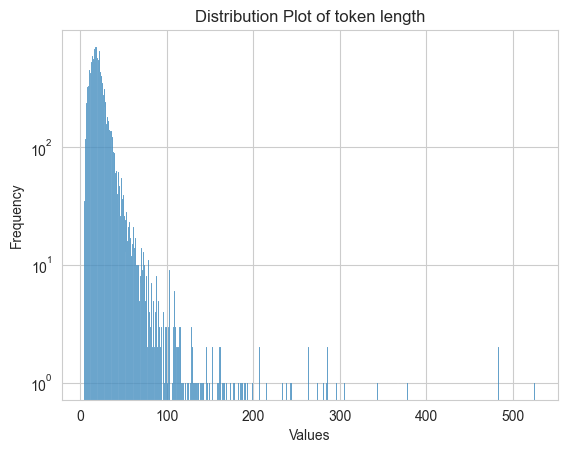

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

min_value = np.min(list_token_length)
max_value = np.max(list_token_length)
average = np.mean(list_token_length)
median = np.median(list_token_length)

print(f"Min: {min_value}")
print(f"Max: {max_value}") # apparently, one single input is longer than 512 and is truncated - I dont see an issue there
print(f"Average: {average:.2f}")
print(f"Median: {median:.2f}")

sns.histplot(list_token_length, kde=False)
plt.title("Distribution Plot of token length")
plt.yscale('log') # Adding a log scale at the y-axis to give more visibility to the long inputs
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()